In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

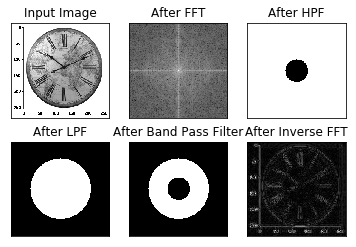

In [10]:
real_img = cv2.imread('clock.png', 0)                 # read image
real_img = np.float32(real_img)                       # convert image to float
mask = np.copy(real_img)                              # copy original image to create mask
row, col = real_img.shape                             # retrieve number of rows and columns
c_row, c_col = int(row / 2), int(col / 2)             # determine center of rows and columns
r_max = 80                                            # user defined values for the band (range constants)
r_min = 30

# Fourier Transform
f_array = np.fft.fft2(real_img)                       # 2D fast Fourier transform to get frequency transform
f_shift = np.fft.fftshift(f_array)                    # move zero frequency to the center of the spectrum
fft = np.log10(abs(f_shift))                          # compute logarithm of the absolute value of the complex number

# Apply High Pass Filter
hpf_mask = np.ones((row, col), np.uint8)              # change all rows and columns to 1
r = 30
x, y = np.ogrid[:row, :col]                           # returns mesh grid
hpf_mask_area = (x - c_row) ** 2 + (y - c_col) ** 2 <= r*r      # creating mask in the center
hpf_mask[hpf_mask_area] = 0                           # set 0 for only to the mask area

# Apply Low Pass Filter
lpf_mask = np.zeros((row, col), np.uint8)             # change all rows and columns to 0
r = 80
x, y = np.ogrid[:row, :col]
lpf_mask_area = (x - c_row) ** 2 + (y - c_col) ** 2 <= r*r
lpf_mask[lpf_mask_area] = 1                           # set 1 for only to the mask area

# Band pass filter
mask = np.zeros((row, col), np.uint8)
x, y = np.ogrid[:row, :col]
mask_area = np.logical_and(((x - c_row) ** 2 + (y - c_col) ** 2 >= r_min ** 2),     # creating concentric circle mask
                           ((x - c_row) ** 2 + (y - c_col) ** 2 <= r_max ** 2))
mask[mask_area] = 1                                   # set 1 for only the points that are in the mask area

# Inverse Fourier Transform
f_shift = f_shift * mask                              # apply mask with frequency transform
fi_shift = np.fft.ifftshift(f_shift)                  # move zero frequency to the top left corner
i_fft = np.fft.ifft2(fi_shift)                        # 2D Inverse fast Fourier transform
i_fft = np.abs(i_fft)                                 # get the absolute value of the complex number

# Visualization of all images
plt.subplot(2, 3, 1), plt.imshow(real_img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 3, 2), plt.imshow(fft, cmap='gray')
plt.title('After FFT'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 3, 3), plt.imshow(hpf_mask, cmap='gray')
plt.title('After HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 3, 4), plt.imshow(lpf_mask, cmap='gray')
plt.title('After LPF'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 3, 5), plt.imshow(mask, cmap='gray')
plt.title('After Band Pass Filter'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 3, 6), plt.imshow(i_fft, cmap='gray')
plt.title('After Inverse FFT'), plt.xticks([]), plt.yticks([])
plt.show()